In [140]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [141]:
from skimage.feature import canny, corner_harris, corner_peaks
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

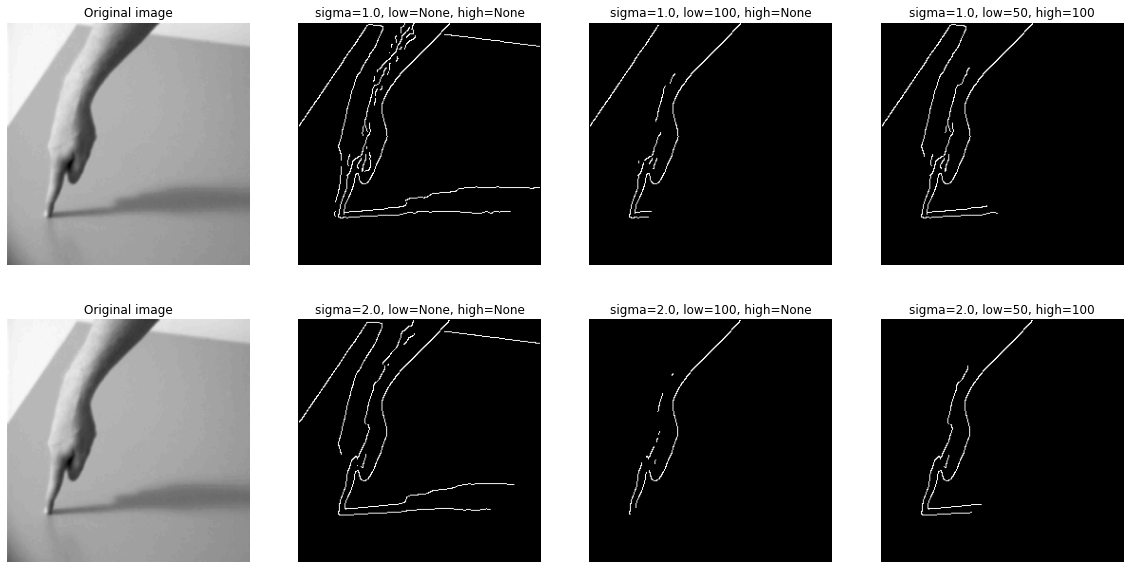

In [142]:
# 1.1
hand = imread('hand.tiff', as_gray=True)
hand_1 = canny(hand, sigma=1)
hand_2 = canny(hand, sigma=1, low_threshold=100, high_threshold=None)
hand_3 = canny(hand, sigma=1, low_threshold=50, high_threshold=100)
hand_4 = canny(hand, sigma=2)
hand_5 = canny(hand, sigma=2, low_threshold=100, high_threshold=None)
hand_6 = canny(hand, sigma=2, low_threshold=50, high_threshold=100)

fig, axs = plt.subplots(2, 4, figsize=(20,10))
axs[0,0].imshow(hand, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,0].axis('off')
axs[0,1].imshow(hand_1, cmap='gray')
axs[0,1].set_title('sigma=1.0, low=None, high=None')
axs[0,1].axis('off')
axs[0,2].imshow(hand_2, cmap='gray')
axs[0,2].set_title('sigma=1.0, low=100, high=None')
axs[0,2].axis('off')
axs[0,3].imshow(hand_3, cmap='gray')
axs[0,3].set_title('sigma=1.0, low=50, high=100')
axs[0,3].axis('off')
axs[1,0].imshow(hand, cmap='gray')
axs[1,0].set_title('Original image')
axs[1,0].axis('off')
axs[1,1].imshow(hand_4, cmap='gray')
axs[1,1].set_title('sigma=2.0, low=None, high=None')
axs[1,1].axis('off')
axs[1,2].imshow(hand_5, cmap='gray')
axs[1,2].set_title('sigma=2.0, low=100, high=None')
axs[1,2].axis('off')
axs[1,3].imshow(hand_6, cmap='gray')
axs[1,3].set_title('sigma=2.0, low=50, high=100')
axs[1,3].axis('off')
plt.show()

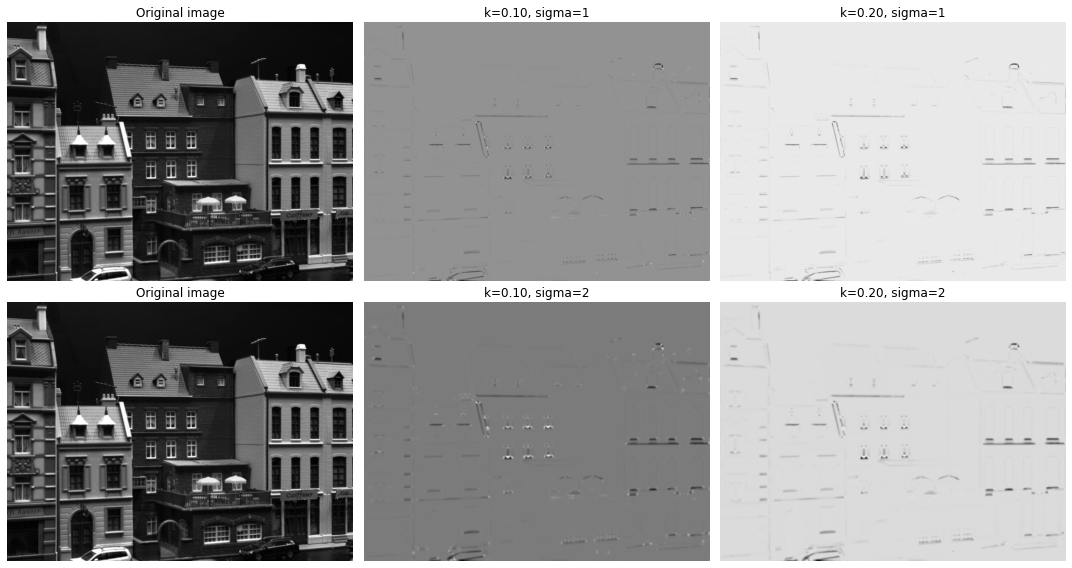

In [143]:
# 1.2
modelhouses = imread('modelhouses.png', as_gray=True)
modelhouses_1 = corner_harris(modelhouses, k=0.10, sigma=1)
modelhouses_2 = corner_harris(modelhouses, k=0.20, sigma=1)
modelhouses_3 = corner_harris(modelhouses, k=0.10, sigma=2)
modelhouses_4 = corner_harris(modelhouses, k=0.20, sigma=2)

fig, axs = plt.subplots(2, 3, figsize=(15,8))
axs[0,0].imshow(modelhouses, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,0].axis('off')
axs[0,1].imshow(modelhouses_1, cmap='gray')
axs[0,1].set_title('k=0.10, sigma=1')
axs[0,1].axis('off')
axs[0,2].imshow(modelhouses_2, cmap='gray')
axs[0,2].set_title('k=0.20, sigma=1')
axs[0,2].axis('off')
axs[1,0].imshow(modelhouses, cmap='gray')
axs[1,0].set_title('Original image')
axs[1,0].axis('off')
axs[1,1].imshow(modelhouses_3, cmap='gray')
axs[1,1].set_title('k=0.10, sigma=2')
axs[1,1].axis('off')
axs[1,2].imshow(modelhouses_4, cmap='gray')
axs[1,2].set_title('k=0.20, sigma=2')
axs[1,2].axis('off')
plt.tight_layout()
plt.show()

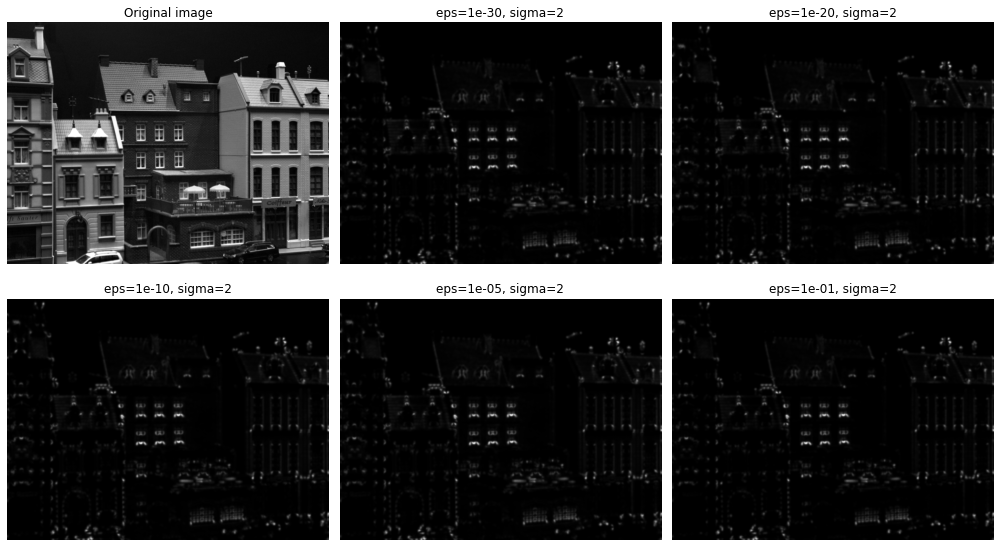

In [144]:
modelhouses_1 = corner_harris(modelhouses, method='eps', eps=1e-30, sigma=2)
modelhouses_2 = corner_harris(modelhouses, method='eps', eps=1e-20, sigma=2)
modelhouses_3 = corner_harris(modelhouses, method='eps', eps=1e-10, sigma=2)
modelhouses_4 = corner_harris(modelhouses, method='eps', eps=1e-05, sigma=2)
modelhouses_5 = corner_harris(modelhouses, method='eps', eps=1e-01, sigma=2)


fig, axs = plt.subplots(2, 3, figsize=(14,8))
axs[0,0].imshow(modelhouses, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,0].axis('off')
axs[0,1].imshow(modelhouses_1, cmap='gray')
axs[0,1].set_title('eps=1e-30, sigma=2')
axs[0,1].axis('off')
axs[0,2].imshow(modelhouses_2, cmap='gray')
axs[0,2].set_title('eps=1e-20, sigma=2')
axs[0,2].axis('off')
axs[1,0].imshow(modelhouses_3, cmap='gray')
axs[1,0].set_title('eps=1e-10, sigma=2')
axs[1,0].axis('off')
axs[1,1].imshow(modelhouses_4, cmap='gray')
axs[1,1].set_title('eps=1e-05, sigma=2')
axs[1,1].axis('off')
axs[1,2].imshow(modelhouses_5, cmap='gray')
axs[1,2].set_title('eps=1e-01, sigma=2')
axs[1,2].axis('off')
plt.tight_layout()
plt.show()

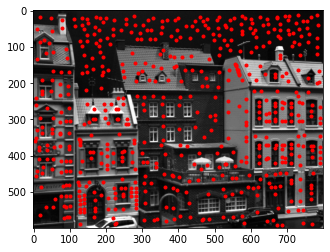

In [145]:
# 1.3
modelhouses = imread('modelhouses.png', as_gray=True)
corner = np.array(corner_peaks(corner_harris(modelhouses, k=0.30, sigma=5)))
plt.imshow(modelhouses, cmap='gray')
plt.scatter(corner[:,1], corner[:,0], marker='.', c='red')
plt.show()

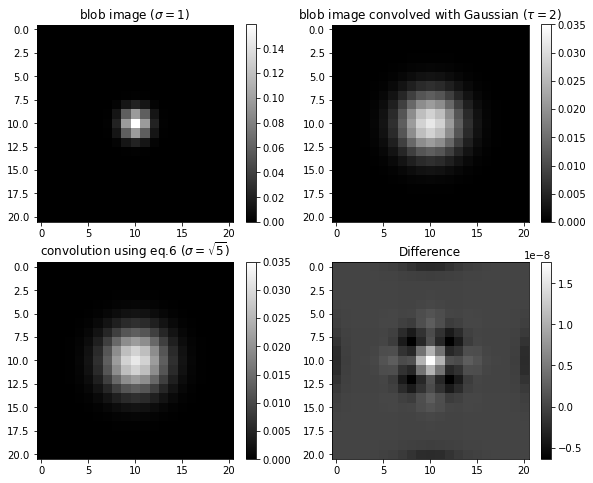

In [50]:
from scipy.signal import fftconvolve, convolve2d

def gaussian_Kernel(x, y, sigma):
    X = np.linspace(-(x - 1) / 2., (x - 1) / 2., x)
    Y = np.linspace(-(y - 1) / 2., (y - 1) / 2., y)
    gauss_x = np.exp(-0.5 * np.square(X) / np.square(sigma))
    gauss_y = np.exp(-0.5 * np.square(Y) / np.square(sigma))
    kernel = np.outer(gauss_x, gauss_y) / (2*np.pi*np.square(sigma))
    return kernel

def test2_1():
    n=21
    blob_image = gaussian_Kernel(n,n,1)
    kernel = gaussian_Kernel(n,n,2)
    image_convolved = convolve2d(blob_image, kernel, mode='same')
    image_using_eq6 = gaussian_Kernel(n,n,np.sqrt(5))
    difference = image_convolved-image_using_eq6


    plt.figure(figsize = (9.7, 8))

    plt.subplot(2,2,1) 
    plt.imshow(blob_image, cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title('blob image 'r'$(\sigma=1)$')

    plt.subplot(2,2,2) 
    plt.imshow(image_convolved, cmap="gray",vmax=0.035, vmin=0)
    plt.axis('on')
    plt.colorbar()
    plt.title('blob image convolved with Gaussian 'r'$(\tau=2)$')

    plt.subplot(2,2,3) 
    plt.imshow(image_using_eq6, cmap="gray",vmax=0.035, vmin=0)
    plt.axis('on')
    plt.colorbar()
    plt.title('convolution using eq.6 'r'$(\sigma=\sqrt{5})$')

    plt.subplot(2,2,4) 
    plt.imshow(difference, cmap="gray")
    plt.axis('on')
    plt.title("Difference")
    plt.colorbar()

    plt.savefig('2.1.png',bbox_inches='tight')
    plt.show()

test2_1()

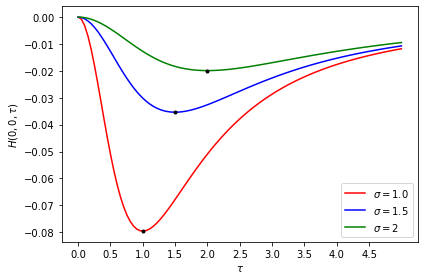

In [51]:
def test_2_3_b():
    def H(tau, sigma=1):
        return (-tau**2) / (np.pi * (sigma**2 + tau**2)**2)

    t = np.linspace(0, 5, 100)  # Only positive values of tau.
    sigmas = [1, 1.5, 2]
    Hs = [H(t, sigma=s) for s in sigmas]
    Ps = [H(s, s) for s in sigmas]

    # Plotting.
    plt.plot(t, Hs[0], 'r', label="$\sigma = 1.0$")
    plt.plot([sigmas[0]], [Ps[0]], marker='o', markersize=3, color="black")
    plt.plot(t, Hs[1], 'b', label="$\sigma = 1.5$")
    plt.plot([sigmas[1]], [Ps[1]], marker='o', markersize=3, color="black")
    plt.plot(t, Hs[2], 'g', label="$\sigma = 2$")
    plt.plot([sigmas[2]], [Ps[2]], marker='o', markersize=3, color="black")
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 5, step=0.5))
    plt.xlabel("$\\tau$")
    plt.ylabel("$H(0,0,\\tau)$")
    plt.tight_layout()
    plt.savefig('2.3.b.png',bbox_inches='tight')
    plt.show()
test_2_3_b()

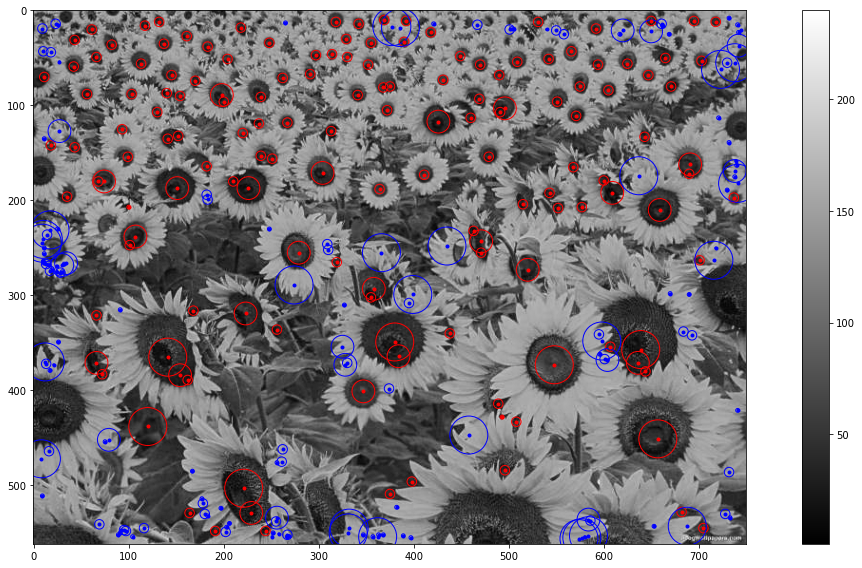

In [146]:
from skimage.feature import peak_local_max
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.signal import convolve2d
# 2.4
def Ixx(x, y, tau, sigma):
    return (x**2-tau**2-sigma**2)*\
        np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

def Iyy(x, y, tau, sigma):
    return (y**2-tau**2-sigma**2)*\
        np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

def H(x, y, tau, sigma=1.0):
    return tau**2*(Ixx(x,y,tau,sigma)+Iyy(x,y,tau,sigma))

def H_kerel(img, tau, sigma=1.0):
    x = np.arange(np.ceil(-img.shape[0]/2), np.ceil(img.shape[0]/2))
    y = np.arange(np.ceil(-img.shape[1]/2), np.ceil(img.shape[1]/2))
    xx, yy = np.meshgrid(x, y)
    return H(xx, yy, tau, sigma)

def find_local_extrema(img_conv, extrema=1):
    coor_local_max = peak_local_max(extrema * img_conv, 
                                    min_distance=1)
    local_max = []
    for i in range(len(coor_local_max)):
        local_max.append(img_conv[coor_local_max[i, 0], coor_local_max[i, 1]])

    arr = np.zeros((len(local_max), 3))
    arr[:, 0:2] = coor_local_max
    arr[:, 2] = local_max
    return arr

def H_tau_arr(I, tau_arr):
    count = 0
    x, y = I.shape
    H_img = np.zeros((x, y, len(tau_arr)))
    for tau in tau_arr:
        dum_ker = np.zeros((int(tau*5), int(tau*5)))
        img_conv = convolve2d(I, H_kerel(dum_ker, tau), mode='same')
        H_img[:,:,count] = img_conv
        count += 1
    H_img_max = np.max(H_img, axis=2)
    ind = np.argmax(H_img, axis=2)
    return (H_img_max, ind)

sunflower = imread('sunflower.tiff', as_gray=True)
tau_arr = [1, 2, 5, 12, 20]
img_conv, ind = H_tau_arr(sunflower, tau_arr)
coor_max = find_local_extrema(img_conv, 1)
coor_min = find_local_extrema(img_conv, -1)
n_points = 150

fig, ax = plt.subplots(figsize=(16, 8))
im = ax.imshow(sunflower, cmap="gray")
ax.plot(coor_max[:n_points, 1], coor_max[:n_points, 0], 'r.')
for i in range(n_points):
    circle_max = plt.Circle((coor_max[i, 1], coor_max[i, 0]), 
                    tau_arr[ind[int(coor_max[i, 0]), int(coor_max[i, 1])]],
                    color='r',
                    fill = False)
    ax.add_artist(circle_max)
ax.plot(coor_min[:n_points, 1], coor_min[:n_points, 0], 'b.')
for i in range(n_points):
    circle_max = plt.Circle((coor_min[i, 1], coor_min[i, 0]), 
                    tau_arr[ind[int(coor_min[i, 0]), int(coor_min[i, 1])]],
                    color='b',
                    fill = False)
    ax.add_artist(circle_max)
fig.colorbar(im)
plt.tight_layout()



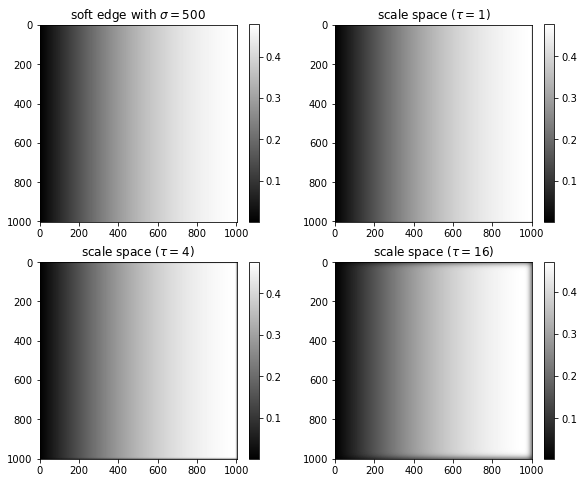

In [52]:
from scipy.signal import fftconvolve, convolve2d

def soft_edge(x, y, sigma):
    l = []
    for x_prime in range(x):
        s = 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-x_prime**2/(2*sigma**2))
        l.append(s)
    img = np.tile(np.cumsum(l), (y,1))
    return img

# def scale_space(img, tau):
#     x,y = img.shape
#     kernel = gaussian_Kernel(x,y,tau)
#     # result = convolve2d(img, kernel, mode='same')
#     result = fftconvolve(img, kernel, mode='same')
#     return result

def scale_space(img, tau):
    x,y = img.shape
    z= tau.size
    result = np.zeros([x,y,z+1])
    result[:,:,0] = img
    for i in range(z):
        kernel = gaussian_Kernel(x,y,tau[i])
        result[:,:,i+1] = fftconvolve(img, kernel, mode='same')
    return result


def test3_1():
    image = soft_edge(1001,1001,500)
    # image = image[100:900,100:900]
    tau = 2**np.array(range(5))
    image_scale_space = scale_space(image, tau)
    # image2 = scale_space(image, tau[0])
    # image3 = scale_space(image, tau[2])
    # image4 = scale_space(image, tau[4])
    # for i in range(6):
    #     print(image_scale_space[0,500,i],image_scale_space[1,500,i])
    

    plt.figure(figsize = (9.7, 8))

    plt.subplot(2,2,1) 
    plt.imshow(image_scale_space[:,:,0], cmap="gray")
    # plt.imshow(target, cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title('soft edge with 'r'$\sigma = 500$')

    plt.subplot(2,2,2) 
    plt.imshow(image_scale_space[:,:,1], cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title('scale space ('r'$\tau=1$)')

    plt.subplot(2,2,3) 
    plt.imshow(image_scale_space[:,:,3], cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title('scale space ('r'$\tau=4$)')

    plt.subplot(2,2,4) 
    plt.imshow(image_scale_space[:,:,5], cmap="gray")
    plt.axis('on')
    plt.title('scale space ('r'$\tau=16$)')
    plt.colorbar()

    plt.savefig('3.1.png',bbox_inches='tight')
    plt.show()

test3_1()

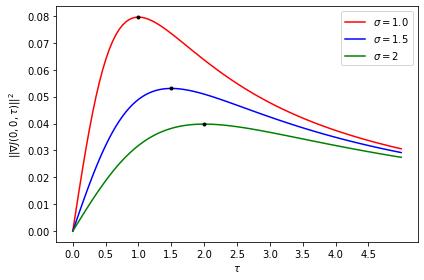

In [53]:
def test_3_2():
    def J(x, y, sigma, xs):
        res = (xs/(2*np.pi*(xs**2+sigma**2)))*np.exp(-x**2/(xs**2+sigma**2))
        return res

    t = np.linspace(0, 5, 100) # Only positive values of tau.
    sigmas = [1, 1.5, 2]
    Hs = [J(0, 0, s, t) for s in sigmas]
    Ps = [J(0, 0, s, s) for s in sigmas]

    # Plotting.
    plt.plot(t, Hs[0], 'r', label="$\sigma = 1.0$") 
    plt.plot([sigmas[0]], [Ps[0]], marker='o', markersize=3, color="black")
    plt.plot(t, Hs[1], 'b', label="$\sigma = 1.5$")
    plt.plot([sigmas[1]], [Ps[1]], marker='o', markersize=3, color="black")
    plt.plot(t, Hs[2], 'g', label="$\sigma = 2$")
    plt.plot([sigmas[2]], [Ps[2]], marker='o', markersize=3, color="black")
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 5, step=0.5))
    plt.xlabel("$\\tau$")
    plt.ylabel("$||\\nabla J(0,0,\\tau)||^{2}$")
    plt.tight_layout()
    plt.savefig('3.2.b.png',bbox_inches='tight')
    plt.show()
test_3_2()

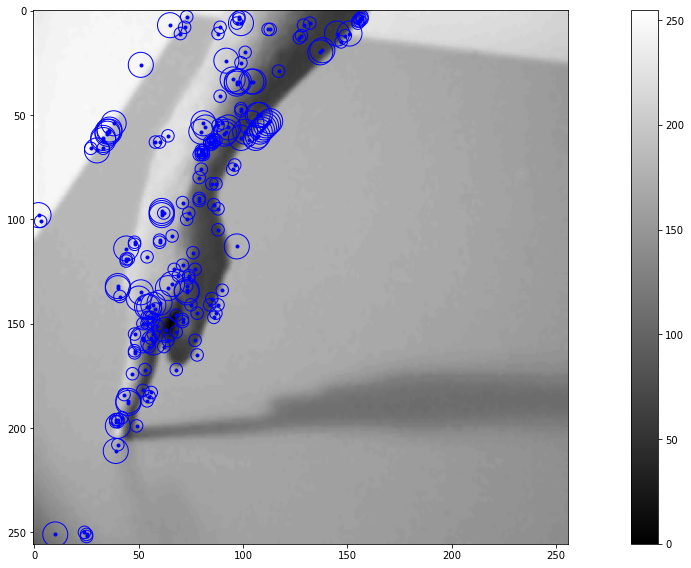

In [147]:
from skimage.feature import peak_local_max
from scipy.ndimage import gaussian_filter

def squared_gradient_image(image,tau):
    Lxx = gaussian_filter(image,tau, order=(1,0))
    Lyy = gaussian_filter(image,tau, order=(0,1))
    result = tau*(Lxx**2+Lyy**2)
    return result
 
def gradient_scale_space(I, tau_arr):
    count = 0
    x, y = I.shape
    H_img = np.zeros((x, y, len(tau_arr)))
    for tau in tau_arr:
        img_conv = squared_gradient_image(I, tau)
        H_img[:,:,count] = img_conv
        count += 1
    return H_img

def find_local_extrema(img_scale_space, extrema=1):
    coor_local_max = peak_local_max(extrema * img_scale_space, 
                                    min_distance=1)
    local_max = []
    for i in range(len(coor_local_max)):
        local_max.append(-img_scale_space[coor_local_max[i, 0], coor_local_max[i, 1], coor_local_max[i, 2]])
    arr = np.zeros((len(local_max), 4))
    arr[:, 0:3] = coor_local_max
    arr[:, 3] = local_max
    res =  arr[arr[:,3].argsort()] 
    return res
def test3_3():
    hand = imread('hand.tiff', as_gray=True)
    tau_arr = [1,2,4,8,16]
    img_scale_space = gradient_scale_space(hand, tau_arr)

    coor_max = find_local_extrema(img_scale_space, 1)
    n_points = 200
    coor_max = coor_max[:n_points,:]

    fig, ax = plt.subplots(figsize=(18, 8))
    im = ax.imshow(hand, cmap="gray")
    ax.plot(coor_max[:, 1], coor_max[:, 0], 'b.')
    for i in range(n_points):
        circle_max = plt.Circle((coor_max[i, 1], coor_max[i, 0]), 
                        coor_max[i, 2]*3,
                        color='b',
                        fill = False)
        ax.add_artist(circle_max)

    fig.colorbar(im)
    plt.tight_layout()
    plt.savefig('3.3.png',bbox_inches='tight')

test3_3()

In [ ]:
# from skimage.feature import peak_local_max
# from scipy.ndimage import gaussian_filter



# def find_local_extrema(img_scale_space, extrema=1):
#     coor_local_max = peak_local_max(extrema * img_scale_space, 
#                                     min_distance=1)
#     print(coor_local_max.shape)
#     print(coor_local_max[50,:])
#     local_max = []
#     for i in range(len(coor_local_max)):
#         local_max.append(-img_scale_space[coor_local_max[i, 0], coor_local_max[i, 1], coor_local_max[i, 2]])

#     arr = np.zeros((len(local_max), 4))
#     arr[:, 0:3] = coor_local_max
#     arr[:, 3] = local_max
#     res =  arr[arr[:,3].argsort()] 
#     # res = arr[np.lexsort(-arr.T)]
#     return res

# def laplace_image(image,tau,gamma=1):
#     Lxx = gaussian_filter(image,tau, order=(2,0))
#     Lyy = gaussian_filter(image,tau, order=(0,2))
#     result = tau**(gamma*2)*(Lxx+Lyy)
#     return abs(result)
# def Ixx(x, y, tau, sigma):
#     return (x**2-tau**2-sigma**2)*np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

# def Iyy(x, y, tau, sigma):
#     return (y**2-tau**2-sigma**2)*np.exp(-(x**2+y**2)/(2*(tau**2+sigma**2)))/(2*np.pi*(tau**2+sigma**2)**3)

# def H(x, y, tau, sigma=1.0):
#     return tau**2*(Ixx(x,y,tau,sigma)+Iyy(x,y,tau,sigma))

# def H_kerel(img, tau, sigma=1.0):
#     x = np.arange(np.ceil(-img.shape[0]/2), np.ceil(img.shape[0]/2))
#     y = np.arange(np.ceil(-img.shape[1]/2), np.ceil(img.shape[1]/2))
#     xx, yy = np.meshgrid(x, y)
#     return H(xx, yy, tau, sigma)
# def H_image(image,tau,gamma=1):
#     dum_ker = np.zeros((int(tau*5), int(tau*5)))
#     img_conv = convolve2d(image, H_kerel(dum_ker, tau), mode='same')
#     return img_conv

# def scale_space(I, tau_arr):
#     count = 0
#     x, y = I.shape
#     H_img = np.zeros((x, y, len(tau_arr)))
#     for tau in tau_arr:
#         img_conv = laplace_image(I, tau)
#         # img_conv = H_image(I, tau)
#         H_img[:,:,count] = img_conv
#         count += 1
#     return H_img


# sunflower = imread('sunflower.tiff', as_gray=True)
# tau_arr = [2,4,8,16]
# img_scale_space = scale_space(sunflower, tau_arr)

# coor_max = find_local_extrema(img_scale_space, 1)
# coor_min = find_local_extrema(img_scale_space, -1)
# n_points = 150
# print(coor_max.shape)
# print(coor_max[0,3],coor_max[1,3],coor_max[2,3],coor_max[40,3],coor_max[41,3],coor_max[42,3])
# print(coor_min[0,3],coor_min[1,3],coor_min[2,3],coor_min[40,3],coor_min[41,3],coor_min[42,3])
# fig, ax = plt.subplots(figsize=(16, 8))
# im = ax.imshow(sunflower, cmap="gray")
# ax.plot(coor_max[:n_points, 1], coor_max[:n_points, 0], 'y.')
# for i in range(n_points):
#     circle_max = plt.Circle((coor_max[i, 1], coor_max[i, 0]), 
#                     coor_max[i, 2]*3,
#                     color='y',
#                     fill = False)
#     ax.add_artist(circle_max)
# ax.plot(coor_min[:n_points, 1], coor_min[:n_points, 0], 'b.')
# for i in range(n_points):
#     circle_min = plt.Circle((coor_min[i, 1], coor_min[i, 0]), 
#                     coor_min[i, 2]*3,
#                     color='b',
#                     fill = False)
#     ax.add_artist(circle_min)
# fig.colorbar(im)
# plt.tight_layout()